In [1]:
import spectrum
import matplotlib.pyplot as plt

In [2]:
data = spectrum.parse_jcampdx(spectrum.get_jcampdx('C57136', 0))
data

{'title': 'UREA',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY\nCollection (C) 2018 copyright by the U.S. Secretary of Commerce\non behalf of the United States of America. All rights reserved.',
 'date': '1963/11/27',
 'cas registry no': '57-13-6',
 'molform': 'C H4 N2 O',
 'source reference': 'COBLENTZ NO. 10212',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10212',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'SOLID (SPLIT MULL, FLUOROLUBE FOR 3800-1333 AND NUJOL FOR 1333-450 CM ^-^1)',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'TRANSMITTANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.85276,
 'firstx': 449.687,
 'lastx': 3801.88,
 'firsty': 0.1

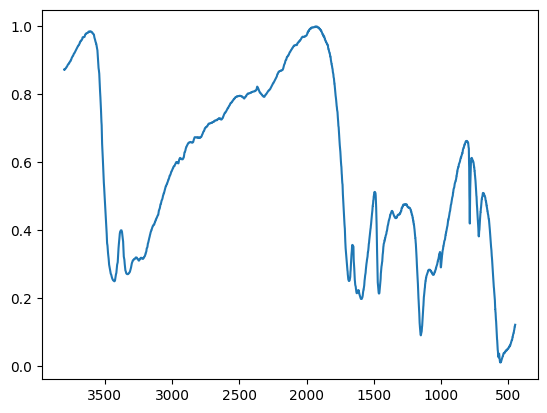

In [3]:
plt.plot(data['x'], data['y'])
plt.gca().invert_xaxis()

[False, True]
ABSORBANCE
[False, True]
ABSORBANCE
[True, False]
TRANSMITTANCE


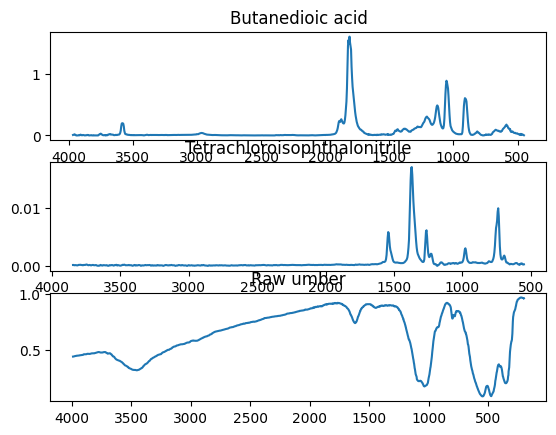

In [4]:
# example for plotting

results = spectrum.search('*ber')
nrows = len(results)
for i, k in enumerate(results):
    data = spectrum.parse_jcampdx(spectrum.get_jcampdx(k,0))
    print(spectrum.spectra_match(data, [(500,600), (1500, 2000)]))
    print(data['yunits'])
    plt.subplot(nrows, 1, i+1)
    plt.plot(data['x'], data['y'])
    plt.gca().invert_xaxis()
    plt.title(results[k][0])

In [5]:
import numpy as np

# filter amides by requiring they have the desired peaks
results = spectrum.search('*amide')
bands = ([1500,1800], [1100, 1350], [2900, 3200]) #roughly matches the strongest ones seen in the homework

filtered_spectra = dict()
for k in results:
    try:
        data = spectrum.parse_jcampdx(spectrum.get_jcampdx(k,0))
    except:
        continue
    matches = spectrum.spectra_match(data, bands)
    if np.all(matches):
        filtered_spectra[k] = results[k]
        print(f'adding {k}: {results[k][0]}')
    else:
        print(f'rejecting {k}: {results[k][0]}')

filtered_spectra

adding C137586: Lidocaine
adding C68122: Formamide, N,N-dimethyl-
rejecting C57136: Urea
adding C62442: Phenacetin
rejecting C60355: Acetamide
adding C77214: Glutethimide
adding C105602: Caprolactam
adding C57534: Meprobamate
adding C127195: N,N-Dimethylacetamide
rejecting C60515: Dimethoate
rejecting C75127: Formamide
rejecting C103844: Acetamide, N-phenyl-
adding C79050: Propanamide


/home/kcw/code/nist-webbook-ir/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/kcw/code/nist-webbook-ir/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kcw/code/nist-webbook-ir/env/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kcw/code/nist-webbook-ir/env/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/kcw/code/nist-webbook-ir/env/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


rejecting C65452: Salicylamide
rejecting C103902: Acetaminophen
adding C79163: Acetamide, N-methyl-
rejecting C55210: Benzamide
adding C15972608: Alachlor
adding C611745: Benzamide, N,N-dimethyl-
rejecting C62566: Thiourea
adding C298464: Carbamazepine
rejecting C123397: Formamide, N-methyl-
adding C60877: Promethazine
adding C77656: Carbromal
adding C541355: Butanamide
adding C13171216: Phosphamidon
adding C91849: Pyrilamine
rejecting C79061: 2-Propenamide
adding C96888: Mepivacaine
adding C957517: Diphenamid
rejecting C709988: Propanil
rejecting C2591868: 1-Piperidinecarboxaldehyde
rejecting C108134: Propanediamide
adding C625503: Acetamide, N-ethyl-
adding C563837: Propanamide, 2-methyl-
adding C761659: Formamide, N,N-dibutyl-
rejecting C108781: 1,3,5-Triazine-2,4,6-triamine
adding C103811: Benzeneacetamide
adding C617845: Formamide, N,N-diethyl-
rejecting C133062: Captan
adding C877952: Acetamide, N-(2-phenylethyl)-
rejecting C98920: Niacinamide
adding C754109: Propanamide, 2,2-dim

adding C7291330: 2,2,2-Trichloro-N,N-dimethylacetamide
adding C5422344: N-(2-Hydroxyethyl)lactamide
rejecting C18063031: 2,6-Difluorobenzamide
adding C1122561: Cyclohexanecarboxamide
adding C105351: 2-Chloro-N-ethylacetamide
adding C5299649: N-Nonanoylmorpholine
adding C6225065: N,N-Dimethylvaleramide
adding C6282004: N,N-Dipropylformamide
rejecting C445283: ortho-Fluorobenzamide
rejecting C1113684: Acetamide, N-acetyl-N-methyl-
adding C13435126: Acetamide, TMS derivative
adding C5894655: Benzamide, N-(1,1-dimethylethyl)-
adding C110269: 2-Propenamide, N,N'-methylenebis-
rejecting C1907659: Benzenesulfonamide, N-butyl-4-methyl-
adding C2700303: N,N-Diisopropylformamide
adding C2044646: N,N-Dimethylacetoacetamide
rejecting C617367: Ethyl oxamate
adding C120865: N,N'-Bis(2-hydroxyethyl)dithiooxamide
rejecting C610151: Benzamide, 2-nitro-
adding C95318: 2-Benzothiazolesulfenamide, N-(1,1-dimethylethyl)-
rejecting C27816360: 2-Chloropropionamide
adding C2043438: Propanamide, 2-hydroxy-
rej

rejecting C3299647: N,N'-Dicyclohexyloxamide
rejecting C701348: 4-Bromobenzenesulfonamide
adding C22755153: 1-Acetamidopyrene
rejecting C13053811: Acetamide, N-2-thienyl-
rejecting C29686122: Pentanamide, 5-hydroxy-
adding C880524: N-(1-Adamantyl)acetamide
adding C6228735: Cyclopropanecarboxamide
adding C138410: Carzenide
rejecting C85118043: Benzamide, 3,4-fluoro-
adding C4178932: L-Leucyl-p-nitroanilide
adding C4342103: 5-(3',3'-Dibutyl-1'-triazeno)-1,2,3-triazole-4-carboxamide
rejecting C2719213: 4-Acetamidoacetophenone
adding C1448982: Cyanoacetylurea
rejecting C1119295: Pentanamide, 4-methyl-
rejecting C18355754: 2,3-Difluorobenzamide
rejecting C85118021: 2,4-Difluorobenzamide
rejecting C354289: Chlorodifluoroacetamide
rejecting C354767: Pentafluoropropionamide
adding C543215: Acetylene dicarboxamide
rejecting C3147500: 2,6-Dihydroxybenzamide


{'C137586': ('Lidocaine',
  ['  (C', <sub>14</sub>, 'H', <sub>22</sub>, 'N', <sub>2</sub>, 'O)']),
 'C68122': ('Formamide, N,N-dimethyl-',
  ['  (C', <sub>3</sub>, 'H', <sub>7</sub>, 'NO)']),
 'C62442': ('Phenacetin',
  ['  (C', <sub>10</sub>, 'H', <sub>13</sub>, 'NO', <sub>2</sub>, ')']),
 'C77214': ('Glutethimide',
  ['  (C', <sub>13</sub>, 'H', <sub>15</sub>, 'NO', <sub>2</sub>, ')']),
 'C105602': ('Caprolactam', ['  (C', <sub>6</sub>, 'H', <sub>11</sub>, 'NO)']),
 'C57534': ('Meprobamate',
  ['  (C',
   <sub>9</sub>,
   'H',
   <sub>18</sub>,
   'N',
   <sub>2</sub>,
   'O',
   <sub>4</sub>,
   ')']),
 'C127195': ('N,N-Dimethylacetamide',
  ['  (C', <sub>4</sub>, 'H', <sub>9</sub>, 'NO)']),
 'C79050': ('Propanamide', ['  (C', <sub>3</sub>, 'H', <sub>7</sub>, 'NO)']),
 'C79163': ('Acetamide, N-methyl-',
  ['  (C', <sub>3</sub>, 'H', <sub>7</sub>, 'NO)']),
 'C15972608': ('Alachlor',
  ['  (C', <sub>14</sub>, 'H', <sub>20</sub>, 'ClNO', <sub>2</sub>, ')']),
 'C611745': ('Benzamide, N,

plot 0
plot 1
plot 2
plot 3
plot 4


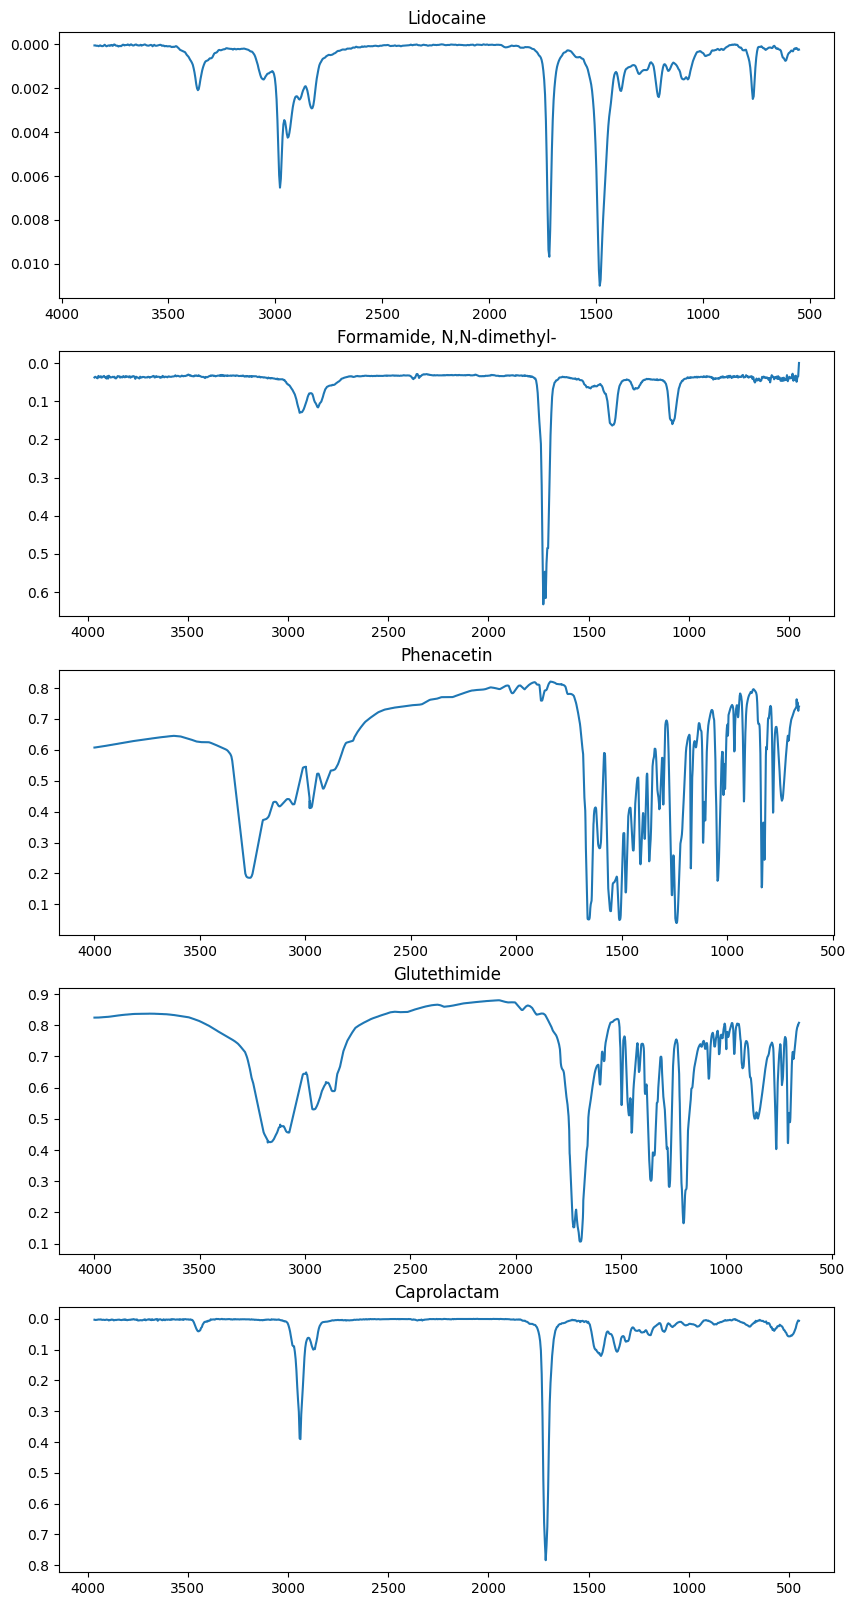

In [19]:
l = list(filtered_spectra)
start = 0
nrows = 5
plt.figure(figsize=(10,20))

for i, k in enumerate(l[start:start+nrows]):
    data = spectrum.parse_jcampdx(spectrum.get_jcampdx(k,0))
    plt.subplot(nrows, 1, i+1)
    plt.plot(data['x'], data['y'])
    plt.gca().invert_xaxis()
    if data.get('yunits') == 'ABSORBANCE':
        plt.gca().invert_yaxis() # make it appear as a transmittance plot would
    plt.title(filtered_spectra[k][0])
    print(f'plot {i}')